# THỰC HÀNH: TRỰC QUAN HÓA DỮ LIỆU TRÊN BỘ DỮ LIỆU CALIFORNIA HOUSING

## PHẦN I: TỔNG QUAN

### 1. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Chỉnh sửa cách hiển thị dữ liệu

# In ra tất cả các hàng
pd.set_option('display.max_rows', None)
# In ra tất cả các cột
pd.set_option('display.max_columns', None)

### 2. Đọc dữ liệu

In [3]:
print("Đang tải dữ liệu...")
df = pd.read_csv("../data/california_housing.csv")

print(f"\nKích thước dữ liệu: {df.shape[0]} hàng và {df.shape[1]} cột")
print("5 dòng đầu tiên của dữ liệu:")
df.head()

Đang tải dữ liệu...

Kích thước dữ liệu: 3000 hàng và 9 cột
5 dòng đầu tiên của dữ liệu:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


### 3. Tổng quan về dữ liệu

In [4]:
# Thông tin tổng quan về tập dữ liệu
print("THÔNG TIN TỔNG QUAN VỀ TẬP DỮ LIỆU")
print("="*50)
print("Dữ liệu gồm các thông tin căn bản về nhà ở cùng với giá nhà trung bình (biến mục tiêu) " \
"tương ứng với từng khu vực (dựa theo vĩ độ và kinh độ) ở California")

print("\nTHÔNG TIN CHI TIẾT VỀ CÁC CỘT:")
print("="*50)
# Hiển thị thông tin về từng cột
df.info()  

print()
print(f"• Tập dữ liệu có {df.shape[1]} thuộc tính và 1 biến mục tiêu")
print(f"• Có tất cả {df.shape[0]} căn nhà trong tập dữ liệu")

if df.isnull().sum().sum() == 0 & df.duplicated().sum() == 0:
    print("\nDữ liệu không có trùng lặp và không có giá trị thiếu!")

THÔNG TIN TỔNG QUAN VỀ TẬP DỮ LIỆU
Dữ liệu gồm các thông tin căn bản về nhà ở cùng với giá nhà trung bình (biến mục tiêu) tương ứng với từng khu vực (dựa theo vĩ độ và kinh độ) ở California

THÔNG TIN CHI TIẾT VỀ CÁC CỘT:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB

• Tập dữ liệu có 9 thuộc tính và 1 biến mục tiêu
• Có tất cả 3000 căn nhà trong tập dữ liệ

## PHẦN 2: THỰC HÀNH

### Bài 1: Pairplot

**Đề bài:**
Vẽ biểu đồ Pairplot cho các biến median_income, housing_median_age, median_house_value.
- Mục tiêu: Quan sát phân bố từng biến (trên đường chéo) và mối quan hệ giữa các cặp biến (các ô scatter).
- Câu hỏi:
    1. Biến nào có mối quan hệ rõ rệt nhất với giá nhà (median_house_value)?
    2. Thu nhập hộ gia đình (median_income) có ảnh hưởng thế nào đến giá nhà?
    3. Tuổi nhà (housing_median_age) có mối liên hệ rõ với thu nhập hoặc giá nhà không?


**1.1.** Vẽ biểu đồ Pairplot cho các biến median_income, housing_median_age và median_house_value

<Figure size 1200x900 with 0 Axes>

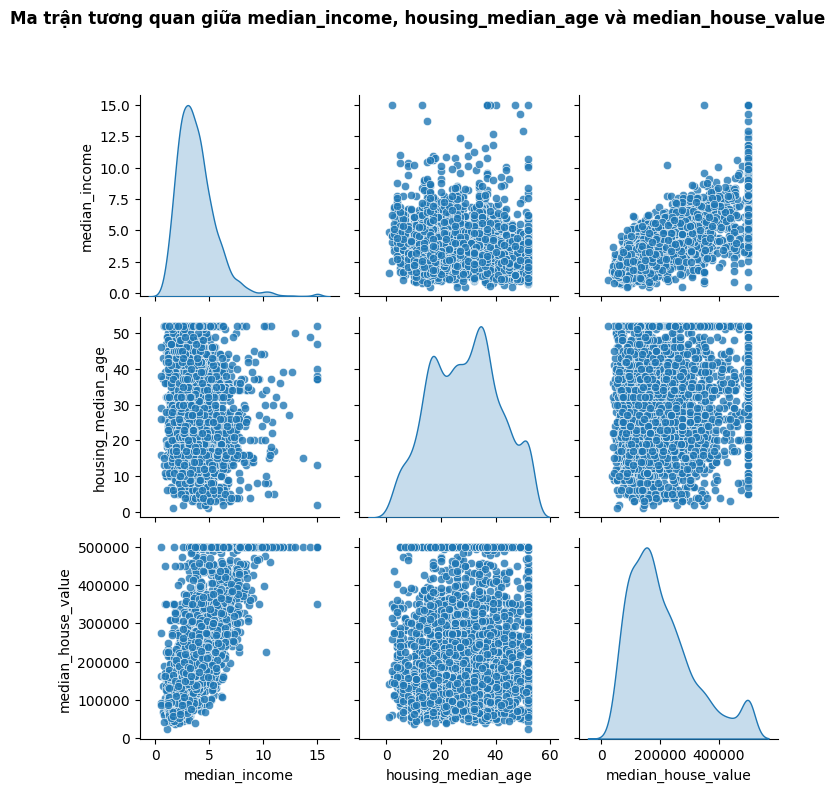

In [5]:
plt.figure(figsize=(12, 9))
sns.pairplot(
    data=df,
    vars=['median_income', 'housing_median_age', 'median_house_value'],
    diag_kind='kde',
    plot_kws={'alpha': 0.8}
)

plt.suptitle("Ma trận tương quan giữa median_income, housing_median_age và median_house_value", fontweight='bold', y=1.05)
plt.tight_layout()

**1.2.** Trả lời câu hỏi

1. Biến median_income có mối quan hệ rõ rệt nhất với giá nhà. 

   Từ biểu đồ scatterplot (hàng 1, cột 3), ta thấy một xu hướng tuyến tính: thu nhập càng cao thì giá nhà càng cao. 
   
   Các điểm dữ liệu tập trung theo đường chéo.

2. Thu nhập hộ gia đình (median_income) có ảnh hưởng quan trọng tới giá nhà.

   Qua biểu đồ scatterplot ta có thể thấy, thu nhập các hộ gia đình càng cao thì giá nhà càng cao.

3. Qua biểu đồ pairplot trên, ta có thể thấy:
- Tuổi nhà có mối quan hệ yếu với giá nhà và thu nhập.
- Phân bố của tuổi nhà khá đồng đều, không có xu hướng cụ thể, rõ ràng.
- Tuổi nhà không phải yếu tố quyết định chính tới giá nhà.

### Bài 2: Heatmap ma trận tương quan

**Đề bài:**
Tính hệ số tương quan Pearson giữa các biến số trong tập dữ liệu và vẽ heatmap.
- Mục tiêu: Phân tích mức độ liên hệ tuyến tính giữa các biến.
- Câu hỏi:
   1. Nhóm biến nào có tương quan rất cao với nhau?
   2. Biến nào có tương quan mạnh nhất với median_house_value?
   3. Khi xây dựng mô hình, cần lưu ý gì khi nhiều biến có tương quan gần 1?

**2.1.** Vẽ heatmap

Text(0.5, 1.0, 'Ma trận tương quan giữa các biến trong tập dữ liệu')

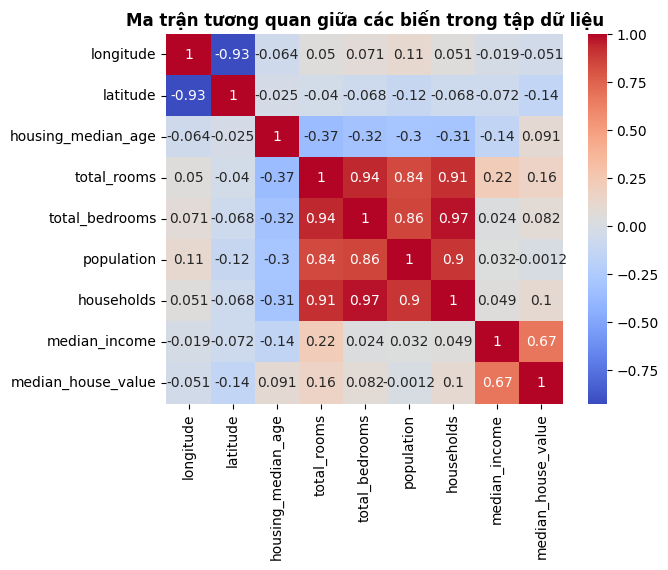

In [6]:
# Ma trận hệ số tương quan Pearson
cov_matrix = df.corr(method='pearson')

# Vẽ heatmap dựa vào ma trận hệ số tương quan
sns.heatmap(
    data=cov_matrix,
    annot=True,
    cmap='coolwarm',
)
plt.title("Ma trận tương quan giữa các biến trong tập dữ liệu", fontweight='bold')


**2.2.** Trả lời câu hỏi

1. Các nhóm biến có tương quan rất cao với nhau:
   - Biến 'longitude' và 'latitude' (-0.93)
   - Biến 'total_rooms' và 'total_bedrooms' (0.94)
   - Biến 'total_rooms' và 'population' (0.84)
   - Biến 'total_rooms' và 'households' (0.91)
   - Biến 'total_bedrooms' và 'population' (0.86)
   - Biến 'total_bedrooms' và 'households' (0.97)
   - Biến 'population' và 'households' (0.9)

   Các biến này mô tả quy mô dân cư và nhà ở, nên dễ hiểu khi chúng có mối tương quan cao với nhau.

2. Biến có tương quan mạnh nhất với median_house_value là median_income (mối quan hệ tuyến tính dương khá mạnh)

   Điều này cho thấy thu nhập trung vị càng cao thì giá nhà trung vị càng cao.

3. Khi có nhiều biến có tương quan rất cao (gần 1), ta gặp vấn đề được gọi là đa cộng tuyến.
   - Đa cộng tuyến làm mất đi tính diễn giải của mô hình.
   - Các hệ số của biến tương quan có thể thay đổi rất lớn so với sự thay đổi nhỏ của dữ liệu.
   - Đa cộng tuyến khiến cho mô hình khó diễn giải: ta không thể biết được tác động riêng lẻ
   của từng biến tương quan.

   Do đó khi xây dựng mô hình, nếu dữ liệu có nhiều biến tương quan rất cao, ta có thể áp dụng các phương pháp sau:
   - Loại bỏ một trong các biến có tương quan cao (chỉ giữ biến đại diện)
   - Dùng các kỹ thuật giảm chiều dữ liệu như PCA.
   - Kết hợp các biến có tương quan cao thành một biến duy nhất.

### Bài 3: FacetGrid Histogram + KDE

**Đề bài:**
Chia biến housing_median_age thành các nhóm tuổi (0–10, 11–20, 21–30, 31–40, 41–50) và vẽ biểu đồ Histogram + KDE 
để quan sát phân bố giá nhà (median_house_value) trong từng nhóm.
- Mục tiêu: So sánh sự khác biệt trong phân bố giá nhà theo tuổi nhà.
- Câu hỏi:
   1. Nhóm tuổi nhà nào tập trung nhiều ở mức giá thấp?
   2. Nhóm nào có phân bố giá trải rộng hơn?
   3. Có mối quan hệ tuyến tính rõ rệt giữa tuổi nhà và giá nhà không?


**3.1.** Vẽ Histogam + KDE

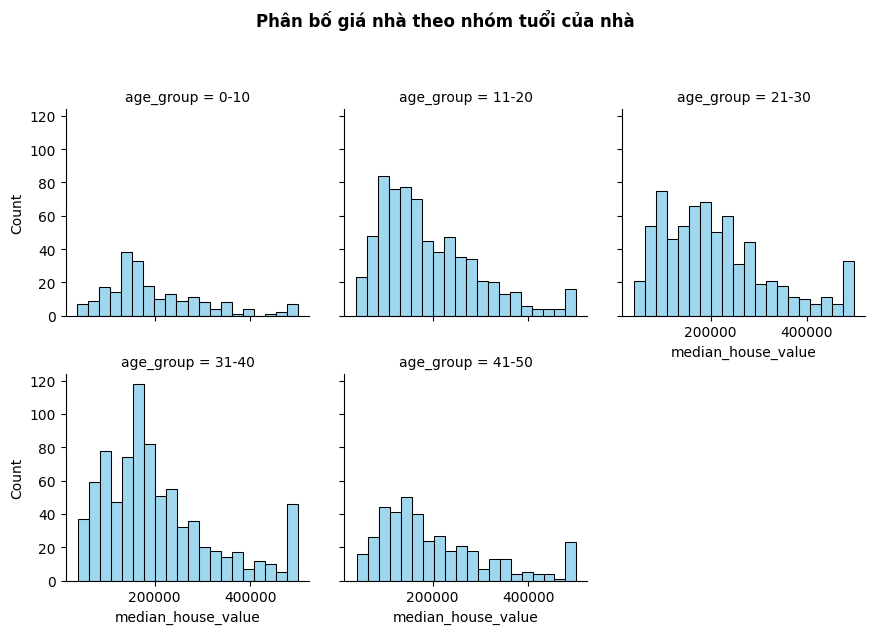

In [7]:
# Tạo nhóm tuổi cho thuộc tính 'housing_median_age'
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50']

df['age_group'] = pd.cut(df['housing_median_age'], bins=bins, labels=labels, include_lowest=True)

# Tạo FacetGrid để vẽ kde riêng cho từng nhóm tuổi
g = sns.FacetGrid(
    data=df, 
    col='age_group',
    col_wrap=3
)

g.map(
    sns.histplot,
    'median_house_value',
    color='skyblue',
    alpha=0.8,
    fill=True,
    bins=20,
)

plt.suptitle("Phân bố giá nhà theo nhóm tuổi của nhà", fontweight='bold', y=1.05)
plt.tight_layout()

**3.2.** Trả lời câu hỏi

1. Nhìn chung, các nhóm tuổi nhà 11-20, 21-30, 31-40 đều cho thấy sự tập trung rõ rệt ở các mức giá thấp
   (phần lớn đều nhỏ hơn $200000)

   Trong đó, nhóm 31-40 tuổi có đỉnh (mode) cao nhất và hẹp nhất, cho thấy sự tập trung rất lớn quanh một
   giá trị cụ thể (khoảng từ $170000 đến $230000)

2. Nhóm 0-10 tuổi có phân bố giá dàn trải và ít chênh lệch nhất. 

   Biểu đồ của nhóm tuổi này không có một đỉnh cao rõ rệt, mà số lượng nhà được phân bổ ở nhiều mức giá khác nhau.

3. Không có mối quan hệ tuyến tính giữa tuổi nhà và giá nhà. Biểu đồ cho ta thấy một mối quan hệ phức tạp hơn:
   - Nhà mới (0-10) có giá dàn trải.
   - Nhà trung niên (11-40) có xu hướng tập trung nhiều ở mức giá thấp (dưới $200000)
   - Nhà cũ hơn (41-50) bắt đầu có xu hướng phân bổ trải rộng trở lại.